In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.duplicated().sum()

240

In [7]:
df.drop_duplicates(keep='first')
df.shape

(1599, 12)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
q1 = df.quantile(0.25) 
q3 = df.quantile(0.75)  
iqr = q3-q1
print(iqr)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [10]:
outlier_data = (df < (q1-1.5*iqr))| (df > (q3 + 1.5*iqr))
print(outlier_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

In [11]:
df = df[~outlier_data.any(axis=1)]
df.shape

(1179, 12)

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
std,1.458270,0.164231,0.179441,0.440972,0.014317,8.792916,26.106438,0.001593,0.131731,0.116098,0.963954,0.721248
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,56.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


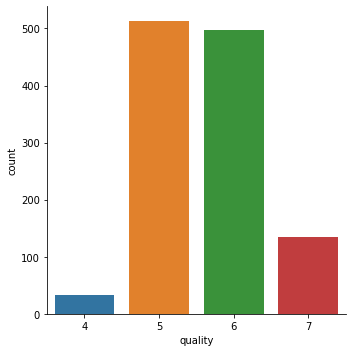

In [13]:
sns.catplot(x='quality', data = df, kind = 'count')

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

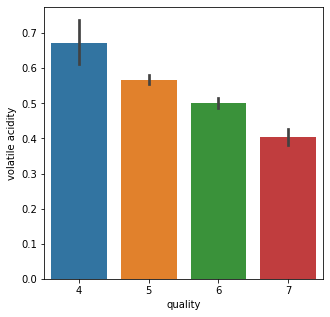

In [14]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'volatile acidity' , data = df)

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

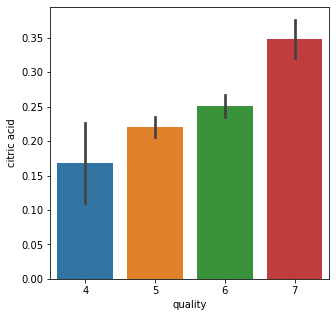

In [15]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'citric acid' , data = df)

<AxesSubplot: xlabel='quality', ylabel='alcohol'>

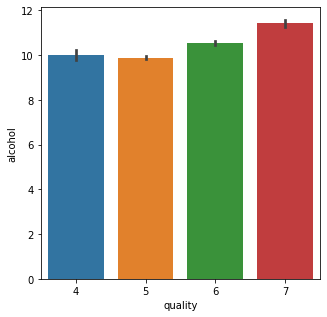

In [16]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'alcohol' , data = df)

In [17]:
correlation = df.corr()
print(correlation)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.271010     0.659397   
volatile acidity          -0.271010          1.000000    -0.627194   
citric acid                0.659397         -0.627194     1.000000   
residual sugar             0.229653          0.035215     0.149494   
chlorides                  0.197774          0.117805     0.073031   
free sulfur dioxide       -0.150845         -0.016718    -0.068852   
total sulfur dioxide      -0.087083          0.097487     0.004660   
density                    0.610125          0.044174     0.305458   
pH                        -0.684378          0.220702    -0.470286   
sulphates                  0.165367         -0.317346     0.256747   
alcohol                   -0.037999         -0.220600     0.137762   
quality                    0.113422         -0.346962     0.212133   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<AxesSubplot: >

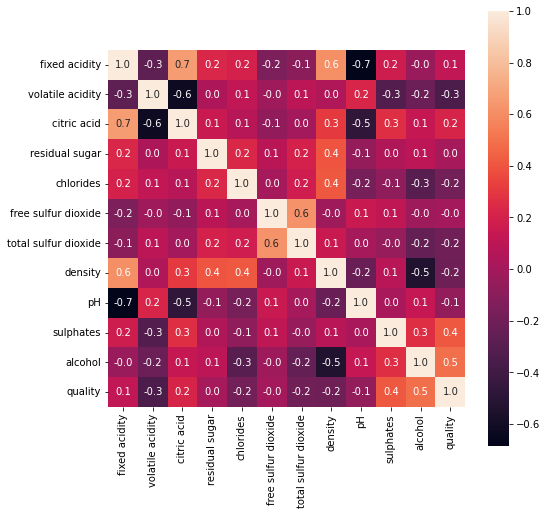

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, square = True, fmt = '.1f', annot =  True)

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
x=df.drop(['quality'], axis=1)
y=df['quality']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 26)

In [35]:
numeric_cols = make_column_selector(dtype_include='number')(x)
column_trans = make_column_transformer([StandardScaler(),numeric_cols])

In [39]:
model = LinearRegression()
pipeline = make_pipeline(column_trans, model)
pipeline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('linearregression', LinearRegression())])

In [43]:
y_pred = pipeline.predict(x_test)

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [45]:
sc = r2_score(y_test, y_pred)
print(sc)

0.3934039571487786


In [56]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.2941155332095109


The R-squared (R2) score and Mean Squared Error (MSE) are two important metrics used to evaluate the performance of a regression model:

1. **R-squared (R2) Score (0.3934):**
   - The R2 score measures the proportion of the variance in the target variable that the model explains.
   - An R2 score of 0.3934 indicates that the linear regression model explains approximately 39.34% of the variance in the wine quality predictions.
   - This score suggests that the model captures some of the underlying patterns in the data but may not provide a strong fit. It implies that there might be other factors or complexities that the model hasn't accounted for.

2. **Mean Squared Error (MSE) (0.2941):**
   - The MSE measures the average squared difference between the predicted and actual values.
   - An MSE of 0.2941 indicates that, on average, the squared difference between the predicted and actual wine quality values is 0.2941.
   - Lower MSE values are desirable, indicating that the model's predictions are closer to the actual values.

In summary, the R2 score suggests that the linear regression model explains a moderate portion of the variance in wine quality, while the MSE reflects the level of prediction error. These metrics provide insights into the model's performance, but further analysis or model refinement may be needed to improve prediction accuracy.